# Gantt Chart
This notebook is demonstrating a relatively straightforward way of creating a Gantt Chart using Python and the Pandas, Numpy, and Matplotlib packages. It is heavily inspired by the examples found [here]() and [here]().

There are several useful packages, classes, modules available for making Gantt charts using Python:
* https://github.com/stefanSchinkel/gantt
* using Plotly: https://plot.ly/python/gantt/
* using Bokeh:
* Alexandre Norman's [python-gantt](https://pypi.python.org/pypi/python-gantt/) package: http://xael.org/pages/python-gantt-en.html


Software versions are listed at the end of the notebook using JR Johansson's excellent `version_information` Jupyter extension. See the version_information [example notebook](https://nbviewer.jupyter.org/github/jrjohansson/version_information/blob/master/example.ipynb) for installation instructions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [2]:
%matplotlib inline

### Tasks


In [11]:
# set up empty DataFrame
df=pd.DataFrame(columns=['Task','Start','End','Color'])

# define work packages etc
Tasks=[
    ['$\mathbf{WP1\/Work\/Package\/Title}$','2018-10-1','2020-9-30','blue'],
    ['T1.1 Task 1 in WP1','2018-10-1','2020-9-30','gray'],
    ['T1.2 Task 2 in WP2','2019-4-1','2020-9-30','gray'],
    ['$\mathbf{WP2\/Work\/Package\/Title}$','2018-10-1','2021-9-30','blue'],
    ['T2.1 Task 1 in WP2','2018-10-1','2020-9-30','gray'],
    ['T2.2 Task 2 in WP2','2018-10-1','2021-9-30','gray'],
    ] #first items on bottom

# reverse order of task list
for i,Dat in enumerate(Tasks[::-1]):
    df.loc[i]=Dat

# convert date strings to datetime fields:
df.Start=pd.to_datetime(df.Start)
df.End=pd.to_datetime(df.End)

# add name to index column
df.index.rename('Task_Index', inplace=True)

# display DataFrame
df

,Task,Start,End,Color
Task_Index,,,,
0,T2.2 Task 2 in WP2,2018-10-01,2021-09-30,gray
1,T2.1 Task 1 in WP2,2018-10-01,2020-09-30,gray
2,$\mathbf{WP2\/Work\/Package\/Title}$,2018-10-01,2021-09-30,blue
3,T1.2 Task 2 in WP2,2019-04-01,2020-09-30,gray
4,T1.1 Task 1 in WP1,2018-10-01,2020-09-30,gray
5,$\mathbf{WP1\/Work\/Package\/Title}$,2018-10-01,2020-09-30,blue


### Milestones

In [12]:
# define Milestones

df_m =pd.DataFrame(columns=['Milestone_id','Description', 'Project_Month','Task_Index'])

Milestones = [['M1', 'description', 9, 4], 
              ['M2', 'description', 12, 3],
              ['M3', 'description', 15, 1],
              ['M4', 'description', 20, 0]]

# add milestone data to DataFrame
for i,M in enumerate(Milestones):
    df_m.loc[i]=M

# make a date range with monthly resolution for whole project period
proj_months = pd.date_range(start='2018-10-01', end='2021-12-31', freq='M')
    
# get milestone month indices
milestone_date_indices = df_m['Project_Month'].values.astype(int)-1

# select months with milestones and add to DataFrame
df_m['Milestone_Dates'] = proj_months[milestone_date_indices]

df_m

,Milestone_id,Description,Project_Month,Task_Index,Milestone_Dates
0,M1,description,9,4,2019-06-30
1,M2,description,12,3,2019-09-30
2,M3,description,15,1,2019-12-31
3,M4,description,20,0,2020-05-31


### Gantt Chart

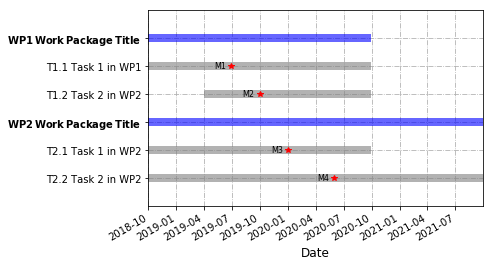

In [16]:
# designate variables
x2 = df.End.values
x1 = df.Start.values
y = df.index.astype(np.int)
names = df.Task.values

labels, ticklocs= [], []

# colors
color = df.Color.tolist()

# set up figure canvas and plot axes
plt.figure(figsize=(35,3))
fig, ax = plt.subplots()

# generate a line and line properties for each task
for i in range(len(y)):
    plt.hlines(i+1, x1[i], x2[i], label=y[i], color=color[i], linewidth=8 ,alpha=0.6)
    labels.append(names[i])
    ticklocs.append(i+1)

# set y limits
ax.set_ylim(0,len(y)+1)
plt.yticks(ticklocs, labels, fontsize=10)

# create custom date labels using Pandas' data range tools
xlabels = pd.date_range(start=df.Start.min(), end=df.End.max(), freq='3MS')

# set x-axis tick locations
plt.xticks(xlabels, xlabels)

# set x-axis limits
ax.set_xlim(df.Start.min(),df.End.max())

# set x-axis label
ax.set_xlabel('Date', fontsize=12)

# modify date labels
dateFmt = dates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(dateFmt)
fig.autofmt_xdate()

# add grid lines
plt.grid(ls='-.')

# set chart title
#plt.title('ProjectName Project Schedule')

# plot stars to indicate milestone deadlines
ax.plot(df_m['Milestone_Dates'], df_m['Task_Index']+1, marker='*', ms=6, color='red', ls='')

# add text with Milestone label to each milestone marker, offset label to place it 

texts = []

for i, txt in enumerate( df_m['Milestone_id'] ):
    ax.text(df_m['Milestone_Dates'].loc[i]+pd.DateOffset(days=-55), # x-value (incl offset) for milestone label
            df_m['Task_Index'].loc[i]+0.9, txt, fontsize=8) # y-value (incl small offset for milestone label)
    
#ax.annotate(s=df_m['Milestone_id'], xy=(df_m['Milestone_Dates'].values, df_m['Task_Index'].values))

# save the figure, use kwarg bbox_inches='tight' to fit the whole graph on canvas

#plt.savefig('my_gantt_chart.png', bbox_inches='tight', dpi=300);